#UAS-DEEP LEARNING
Nama : Ari Permana Agung <br>
NIM  : i.2111737

In [35]:
#2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np
import random

In [36]:
#3
(x_train,x_label),(y_test,y_label) = cifar100.load_data(label_mode='fine')

In [38]:
#4
indeks_medium_mammals = {
    "Fox": 34,
    "porcupine": 63,
    "possum": 64,
    "raccoon": 66,
    "skunk": 75
}


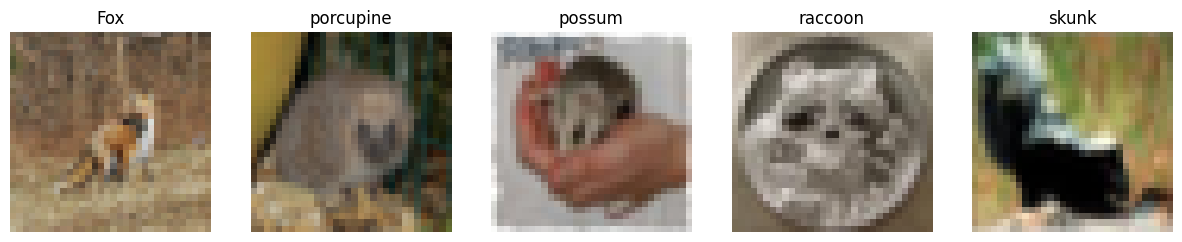

In [39]:
# 5. Code
# Tampilkan seluruh class dari superclass yang dipilih dengan 1 gambar 1 kelas

plt.figure(figsize=(15,3))
for i, (nama_kelas,nama_indeks) in enumerate(indeks_medium_mammals.items()):
    indeks = np.where(x_label.flatten() == nama_indeks)[0][0]
    plt.subplot(1, len(indeks_medium_mammals), i + 1)
    plt.imshow(x_train[indeks])
    plt.title(nama_kelas)
    plt.axis("off")
plt.show()

In [40]:
#Normalisasi
x_train_normalized = x_train / 255.0
y_test_normalized = y_test / 255.0

In [41]:
# 8. Code
# Buat model CNN sebagai model pertama dengan layer yang diperlukan
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

In [43]:
# 9. Code
# model RCNN
model_rcnn = tf.keras.Sequential([
    tf.keras.layers.Reshape((32, 32, 3), input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

## 10. Penjelasan Mengenai Lapisan (Layer) yang Digunakan pada CNN dan RCNN

**CNN (Convolutional Neural Network) Layer:**
1. Conv2D: Lapisan konvolusi dengan 32 filter dan kernel (3, 3), menggunakan aktivasi ReLU.
2. MaxPooling2D: Lapisan max pooling dengan ukuran pool (2, 2).
3. Flatten: Lapisan flatten untuk mengubah output 2D menjadi vektor 1D.
4. Dense: Lapisan fully connected dengan 128 neuron, menggunakan aktivasi ReLU.
5. Dense: Lapisan output dengan 100 neuron (asumsi 100 kelas pada CIFAR-100), menggunakan aktivasi softmax.

**RCNN (Reshape + CNN) Layer:**
1. Reshape: Lapisan reshape untuk mengubah input menjadi bentuk (32, 32, 3).
2. Conv2D: Lapisan konvolusi dengan 32 filter dan kernel (3, 3), menggunakan aktivasi ReLU.
3. MaxPooling2D: Lapisan max pooling dengan ukuran pool (2, 2).
4. Flatten: Lapisan flatten untuk mengubah output 2D menjadi vektor 1D.
5. Dense: Lapisan fully connected dengan 128 neuron, menggunakan aktivasi ReLU.
6. Dense: Lapisan output dengan 100 neuron (asumsi 100 kelas pada CIFAR-100), menggunakan aktivasi softmax.


In [44]:
# 11. Code
# Lakukan compile dan fit pada model pertama dengan hyperparameters yang diberikan
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.fit(x_train_normalized, x_label, epochs=10, batch_size=256)

Epoch 1/10
196/196 [==============================] - 29s 141ms/step - loss: 4.0051 - accuracy: 0.1005
Epoch 2/10
196/196 [==============================] - 28s 144ms/step - loss: 3.3592 - accuracy: 0.1960
Epoch 3/10
196/196 [==============================] - 28s 144ms/step - loss: 3.1455 - accuracy: 0.2394
Epoch 4/10
196/196 [==============================] - 28s 143ms/step - loss: 3.0172 - accuracy: 0.2626
Epoch 5/10
196/196 [==============================] - 28s 142ms/step - loss: 2.9088 - accuracy: 0.2820
Epoch 6/10
196/196 [==============================] - 27s 140ms/step - loss: 2.8348 - accuracy: 0.2963
Epoch 7/10
196/196 [==============================] - 28s 142ms/step - loss: 2.7727 - accuracy: 0.3105
Epoch 8/10
196/196 [==============================] - 28s 141ms/step - loss: 2.7584 - accuracy: 0.3106
Epoch 9/10
196/196 [==============================] - 28s 141ms/step - loss: 2.6864 - accuracy: 0.3239
Epoch 10/10
196/196 [==============================] - 28s 141ms/step - l

In [45]:
# 12. Code
# Lakukan compile dan fit pada model kedua dengan hyperparameter yang sama
model_rcnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_rcnn.fit(x_train_normalized, x_label, epochs=10, batch_size=256)

Epoch 1/10
196/196 [==============================] - 28s 139ms/step - loss: 4.0146 - accuracy: 0.0940
Epoch 2/10
196/196 [==============================] - 27s 139ms/step - loss: 3.4318 - accuracy: 0.1840
Epoch 3/10
196/196 [==============================] - 27s 140ms/step - loss: 3.2552 - accuracy: 0.2142
Epoch 4/10
196/196 [==============================] - 27s 139ms/step - loss: 3.1599 - accuracy: 0.2323
Epoch 5/10
196/196 [==============================] - 27s 139ms/step - loss: 3.0828 - accuracy: 0.2447
Epoch 6/10
196/196 [==============================] - 28s 141ms/step - loss: 3.0241 - accuracy: 0.2579
Epoch 7/10
196/196 [==============================] - 29s 147ms/step - loss: 2.9934 - accuracy: 0.2618
Epoch 8/10
196/196 [==============================] - 28s 141ms/step - loss: 2.9289 - accuracy: 0.2765
Epoch 9/10
196/196 [==============================] - 28s 140ms/step - loss: 2.9273 - accuracy: 0.2782
Epoch 10/10
196/196 [==============================] - 27s 140ms/step - l

In [46]:
# 13. Code
# Simpan kedua model tersebut
model_cnn.save('model_cnn.h5')
model_rcnn.save('model_rcnn.h5')

# Muat kembali model
loaded_model_cnn = tf.keras.models.load_model('model_cnn.h5')
loaded_model_rcnn = tf.keras.models.load_model('model_rcnn.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


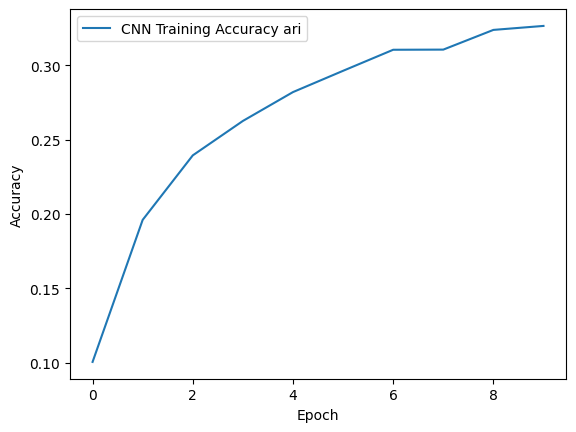

In [48]:
# 14. Code
# Berikan Plot accuracy berdasarkan model pertama
plt.plot(model_cnn.history.history['accuracy'], label='CNN Training Accuracy ari')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 16. Kesimpulan Perbandingan Model Pertama dan Model Kedua
karna CNN juga dirancang untuk tugas klasifikasi gambar jd sangat cocok dgn case berikut, di mana model memprediksi kelas objek pada gambar.
hasil plot accuracy yg terdapat pada data Model pertama (CNN) Memiliki performa yang lebih baik dibandingkan dengan Model kedua (RCNN).